In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.utils import get_file

from deepcell.utils.plot_utils import create_rgb_image
from deepcell.datasets import Dataset
from deepcell_spots.applications import Polaris

/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [2]:
def load_data(self, path=None):
    path = path if path else self.path
    
    basepath = os.path.expanduser(os.path.join('~', '.keras', 'datasets'))
    prefix = path.split(os.path.sep)[:-1]
    data_dir = os.path.join(basepath, *prefix) if prefix else basepath
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    elif not os.path.isdir(data_dir):
        raise IOError('{} exists but is not a directory'.format(data_dir))

    path = get_file(path,
                    origin=self.url,
                    file_hash=self.file_hash)
    
    data = np.load(path)
    spots_image = data['spots_image']
    mesmer_image = data['segmentation_image']
    
    return(spots_image, mesmer_image)

def load_codebook(self, path=None):
    path = path if path else self.path
    
    basepath = os.path.expanduser(os.path.join('~', '.keras', 'datasets'))
    prefix = path.split(os.path.sep)[:-1]
    data_dir = os.path.join(basepath, *prefix) if prefix else basepath
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    elif not os.path.isdir(data_dir):
        raise IOError('{} exists but is not a directory'.format(data_dir))

    path = get_file(path,
                    origin=self.url,
                    file_hash=self.file_hash)
    df = pd.read_csv(path, index_col=0)

    return df

Dataset.load_data = load_data
Dataset.load_codebook = load_codebook

In [3]:
datafile = Dataset(
    path='MERFISH_example.npz',
    url='https://deepcell-data.s3.us-west-1.amazonaws.com/spot_detection/multiplex/Moffitt/MERFISH_example.npz',
    file_hash='2cd7ce177b503fd0873125784097622b',
    metadata={})
spots_image, mesmer_image = datafile.load_data()

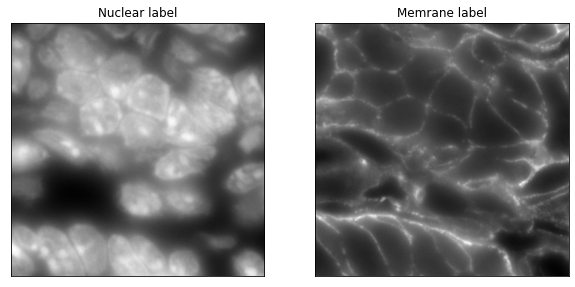

In [4]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].imshow(mesmer_image[0,...,0],cmap='gray')
ax[0].set_title('Nuclear label')
ax[1].imshow(mesmer_image[0,...,1],cmap='gray')
ax[1].set_title('Memrane label')

for i in range(np.shape(ax)[0]):
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

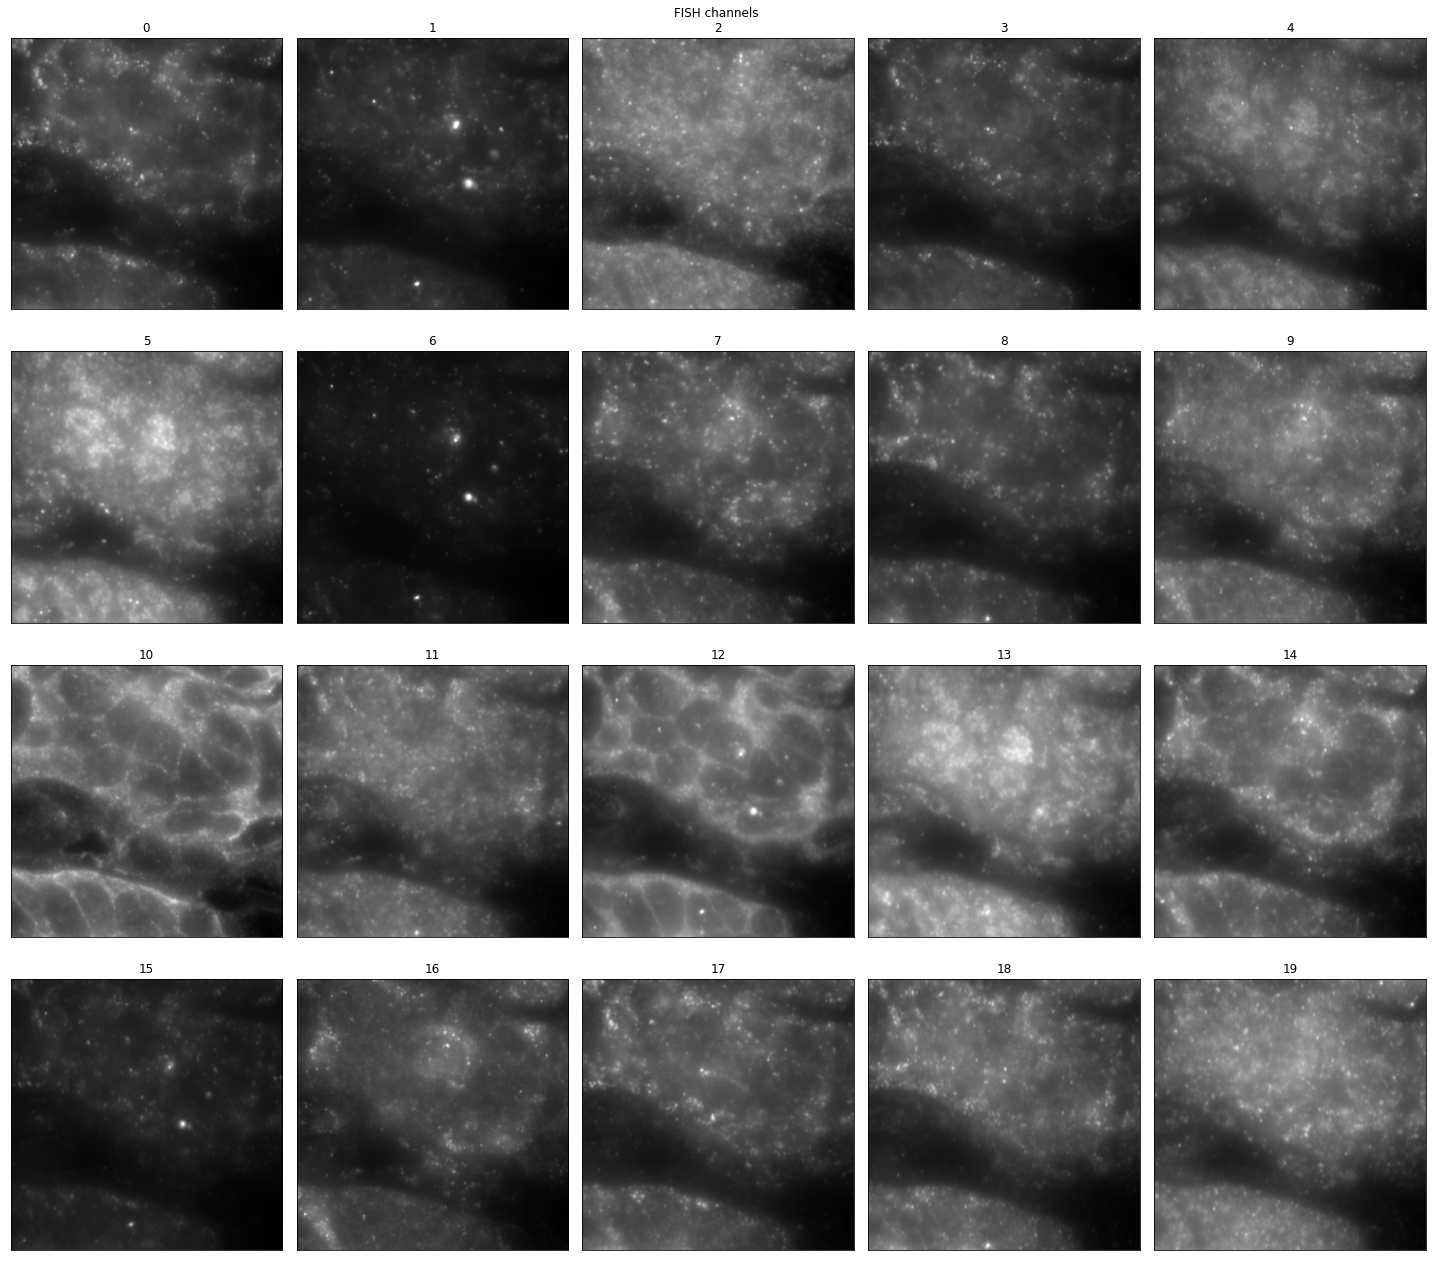

In [5]:
fig,ax = plt.subplots(4,5,figsize=(20, 18))

for idx, ax_d in enumerate(ax.flatten()):
    ax_d.imshow(spots_image[0,..., idx], cmap='gray')
    ax_d.set_title(idx)
    ax_d.set_xticks([])
    ax_d.set_yticks([])

plt.suptitle('FISH channels')
plt.tight_layout()

plt.show()

In [6]:
codebook = Dataset(
    path='codebook.csv',
    url='https://deepcell-data.s3.us-west-1.amazonaws.com/spot_detection/multiplex/Moffitt/codebook.csv',
    file_hash='70a9a4690c3e516ed6f4b0cfe4911a60',
    metadata={})

df_barcodes = codebook.load_codebook()
rounds = 10
channels = 2

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 70a9a4690c3e516ed6f4b0cfe4911a60 so we will re-download the data.
24576/13592 [======================================================] - 0s 0us/step


In [7]:
df_barcodes

,Gene,RS0015,RS0083,RS0095,RS0109,RS0175,RS0237,RS0247,RS0255,RS0307,...,RS0343,RS0384,RS0406,RS0451,RS0468,RS0548,RS0578,RS0584,RS0639,RS0707
1,Slc51a,0,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,Maoa,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,Hmgb2,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,Cps1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5,Txndc5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Blank-20,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0
262,Blank-21,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
263,Blank-22,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
264,Blank-23,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Multiplex

Multiplex FISH datasets encode gene identity with a combinatorial barcode created with sequential rounds of fluorescent staining. Analysis of these datasets with Polaris require `decoding_kwargs` such as the number of `rounds` and `channels` used to create the barcode and a codebook (`df_barcodes`) which defines the relationship between the combinatorial barcodes and gene identities.

Valid options for `segmentation_type` include `mesmer` (whole-cell segmentation model for tissue samples), `cytoplasm` (whole-cell model for cell culture samples), `nucleus` (nuclear model for cell culture samples), and `no_segmentation`. 

In [8]:
multiplex_app = Polaris(image_type='multiplex', 
                        segmentation_type='mesmer',
                        decoding_kwargs={'rounds': rounds, 'channels': channels,
                                         'df_barcodes': df_barcodes})

2023-07-24 23:06:58.851007: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 23:06:59.529080: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9897 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:09:00.0, compute capability: 6.1


96894976/96885295 [==============================] - 2s 0us/step


`spots_image` should have the shape (batch, x, y, channel) where the channel dimension is equal to the product of `rounds` and `channels`. `segmentation_image` should have the shape (1, x, y, channel) where channel is equal to 2 (nuclear and membrane images) if `segmentation_type` is `mesmer`, and 1 otherwhise. `image_mpp` is the pixel size of the image in microns. `clip` defines if outlier pixel values are clipped and `threshold` defines the probability threshold for spots.

In [9]:
multiplex_pred = multiplex_app.predict(spots_image=spots_image,
                                       segmentation_image=mesmer_image,
                                       image_mpp=0.11, clip=True, 
                                       threshold=0.85)

2023-07-24 23:07:19.143902: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
/usr/local/lib/python3.8/dist-packages/deepcell_toolbox/deep_watershed.py:179: FutureWarning: `selem` is a deprecated argument name for `h_maxima`. It will be removed in version 1.0. Please use `footprint` instead.
  markers = h_maxima(image=maxima,


Training...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:17<00:00, 28.69it/s]


Estimating barcode probabilities...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 266/266 [00:00<00:00, 759.35it/s]


Revising errors...


1876it [00:07, 253.65it/s]

551 of 796 rescue attempts were successful.


In [10]:
df_spots = multiplex_pred[0]
df_intensities = multiplex_pred[1]
segmentation_result = multiplex_pred[2]

In [11]:
df_spots

,x,y,batch_id,cell_id,spot_index,predicted_id,predicted_name,probability,source
0,198,18,0,0,0,4,Cps1,0.999981,prediction
1,401,4,0,31,1,6,Klk1,0.999928,prediction
2,299,282,0,25,2,5,Txndc5,1.000000,prediction
3,202,291,0,0,3,54,Stmn1,0.999247,prediction
4,233,215,0,20,4,4,Cps1,0.999960,prediction
...,...,...,...,...,...,...,...,...,...
1871,385,5,0,31,1871,10,Slc12a2,0.989849,prediction
1872,3,118,0,6,1872,267,Unknown,0.929830,prediction
1873,35,320,0,7,1873,266,Background,0.855057,error rescue
1874,405,307,0,0,1874,266,Background,0.999835,error rescue


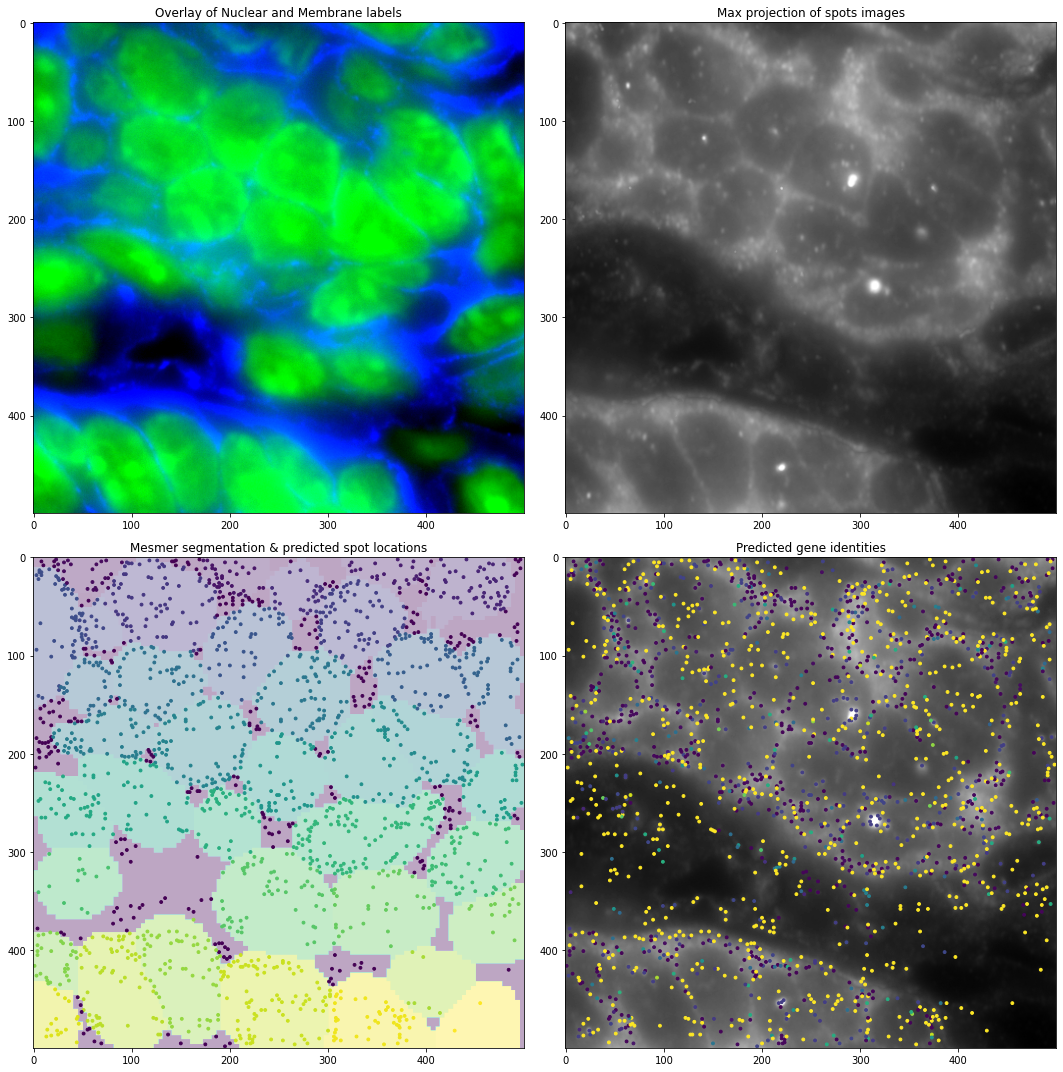

In [12]:
rgb_images = create_rgb_image(mesmer_image, channel_colors=['green', 'blue'])

fig, ax = plt.subplots(2,2, figsize=(15,15))
ax[0,0].imshow(rgb_images[0,...])
ax[0,0].set_title('Overlay of Nuclear and Membrane labels')
ax[1,0].imshow(segmentation_result[0,...,0], cmap='viridis', alpha=0.35)
ax[1,0].scatter(df_spots.y, df_spots.x, c=df_spots.cell_id, cmap='viridis', s=8)
ax[1,0].set_title('Mesmer segmentation & predicted spot locations')
ax[0,1].imshow(np.max(spots_image, axis=-1)[0,...], cmap='gray')
ax[0,1].set_title('Max projection of spots images')
ax[1,1].imshow(np.max(spots_image, axis=-1)[0,...], cmap='gray')
ax[1,1].scatter(df_spots.y, df_spots.x, c=df_spots.predicted_id, cmap='viridis', s=8)
ax[1,1].set_title('Predicted gene identities')

plt.tight_layout()
plt.show()

# Singleplex

The singleplex `image_type` for Polaris performs spot detection, iterating through batches and channels, without assigning barcode identities to the spots. Its implementation is identical to the multiplex version, except `decoding_kwargs` does not need to be defined.

In [13]:
singleplex_app = Polaris(image_type='singleplex', 
                         segmentation_type='mesmer')

In [14]:
singleplex_pred = singleplex_app.predict(spots_image=spots_image,
                                         segmentation_image=mesmer_image,
                                         image_mpp=0.11, clip=True, 
                                         threshold=0.85)

/usr/local/lib/python3.8/dist-packages/deepcell_toolbox/deep_watershed.py:179: FutureWarning: `selem` is a deprecated argument name for `h_maxima`. It will be removed in version 1.0. Please use `footprint` instead.
  markers = h_maxima(image=maxima,


In [15]:
df_spots = singleplex_pred[0]
df_intensities = singleplex_pred[1]
segmentation_result = singleplex_pred[2]

In [16]:
df_spots

,x,y,batch_id,cell_id,spot_index,probability,predicted_id,predicted_name,source
0,198,18,0,0,None,None,None,None,None
1,401,4,0,31,None,None,None,None,None
2,299,282,0,25,None,None,None,None,None
3,202,291,0,0,None,None,None,None,None
4,233,215,0,20,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
1871,385,5,0,31,None,None,None,None,None
1872,3,118,0,6,None,None,None,None,None
1873,35,320,0,7,None,None,None,None,None
1874,405,307,0,0,None,None,None,None,None


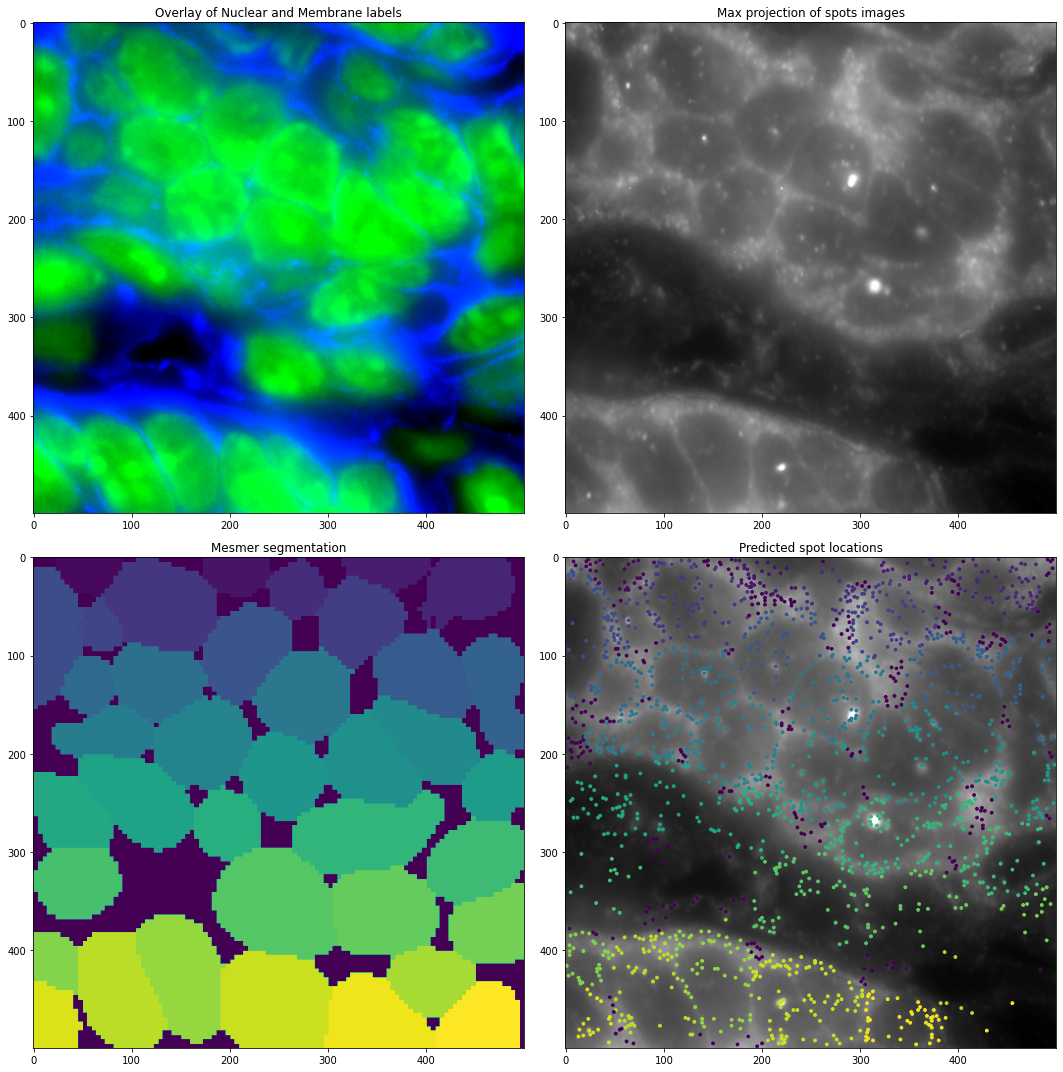

In [17]:
rgb_images = create_rgb_image(mesmer_image, channel_colors=['green', 'blue'])

fig, ax = plt.subplots(2,2, figsize=(15,15))
ax[0,0].imshow(rgb_images[0,...])
ax[0,0].set_title('Overlay of Nuclear and Membrane labels')
ax[1,0].imshow(segmentation_result[0,...,0], cmap='viridis', alpha=1)
ax[1,0].set_title('Mesmer segmentation')
ax[0,1].imshow(np.max(spots_image, axis=-1)[0,...], cmap='gray')
ax[0,1].set_title('Max projection of spots images')
ax[1,1].imshow(np.max(spots_image, axis=-1)[0,...], cmap='gray')
ax[1,1].scatter(df_spots.y, df_spots.x, c=df_spots.cell_id, cmap='viridis', s=8)
ax[1,1].set_title('Predicted spot locations')

plt.tight_layout()
plt.show()